In [1]:
import numpy as np 
from matplotlib import pyplot as plt   

In [43]:
# TODO: make psi_list, which enables superposition
def plot_flow(psi, mask = None,
              x=np.linspace(-2,2,25), y=np.linspace(-2,2,25), h=1e-6):
    """
    Plot a potential flow using the streamfunction. The velocity
    vectors are approximated using finite differences.
    
    Inputs:
     - psi: stream function of x,y
     - mask: bool function of x,y for locations to be masked out
     - x,y: 1D spacing array in x,y. defaults to np.linspace(-2,2,25)
     - h:   finite different spacing to compute U,V. defaults to 1e-6
    """
    X,Y = np.meshgrid(x,y)
    if mask:
        X,Y = (np.ma.masked_where(mask(X,Y),X), 
               np.ma.masked_where(mask(X,Y),Y))
    U =  (psi(X,Y+h)-psi(X,Y-h))/(2*h)
    V = -(psi(X+h,Y)-psi(X-h,Y))/(2*h)
    
    plt.figure(figsize=(4,4),dpi=100)
    plt.quiver(X,Y,U,V)
    plt.contour(X,Y,psi(X,Y),levels=20)
    plt.axis('equal')


def cosd(angle_in_degree):
    return np.cos(np.deg2rad(angle_in_degree))

def sind(angle_in_degree):
    return np.sin(np.deg2rad(angle_in_degree))
    
PI = np.pi

## Flow Past a Closed Body (Rankine Oval)

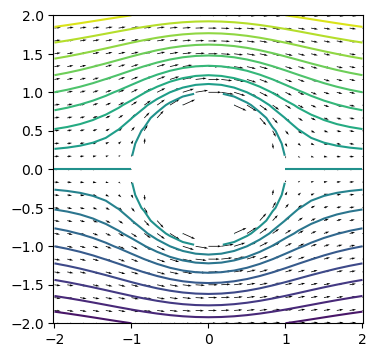

In [8]:
uniform = lambda x,y: y
corner = lambda x,y: x*y
circle = lambda x,y: y-y/(x**2+y**2) 
circle_mask = lambda x,y: x**2+y**2<0.8

# plot_flow(uniform)
# plot_flow(corner)
plot_flow(circle,circle_mask)


## Uniform Flow Potential Function

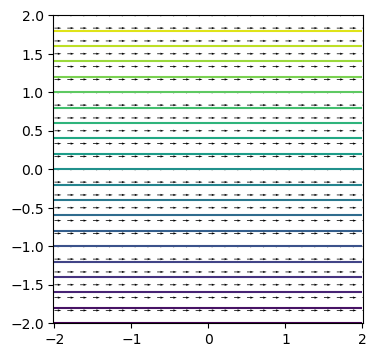

In [19]:
alpha = 0; U = 1
uniform_flow_psi = lambda  x, y: U*(y*cosd(alpha) - x*sind(alpha)) # alpha in degrees
plot_flow(uniform_flow_psi)

## Source or Sink Source or Sink

In [45]:
m = 1 # strength
x0 = y0 = 0
source_or_sink_psi = lambda x, y: m/(2*PI) * np.arctan((y-y0)/(x-x0))
source_or_sink_mask = lambda x,y: x**2+y**2<0.1
plot_flow(source_or_sink_psi)

TypeError: unsupported operand type(s) for +: 'function' and 'function'